# AMS (The statistical model)

## Introduction
**Goal: discover Higgs boson**
* How to discover a new particle?
  * find an excess of events (i.e. more events than predicted by the Standard Model without the new particle) that can be explained by e.g. Higgs production and decay
  * define phase-space region ("search region" or "signal region") enriched in signal events and with as few background events as possible
    * _signal_ = collision events in which the new particle is produced (here: $pp\to h^0 + X$, $h^0\to\tau^+\tau^-$)
    * _background_ = all other events (here e.g. $pp\to Z^0 + X$, $Z^0\to\tau^+\tau^-$)
    * definition done based on expected event yields from simulation
  * then count events in actual data and compare to expected event yields 
    * note: we will not define the phase-space region by hand but have a MVA algorithm do this
  * if number of real events in the selected region is significantly (by convention: $5\sigma$) higher than the number of background events predicted by the model, the discovery of a new particle can be declared
* How to quantify an excess as significant? Is it a discovery or just a fluke?
  * use a test based on the profile-likelihood ratio to reject the background-only hypothesis
  * for details, see [this article][1] or the [manual][2] of the Higgs boson machine learning challenge

[1]: https://arxiv.org/abs/1007.1727
[2]: http://opendata.cern.ch/record/329/

## Derivation
Observed number of events follows a Poisson distribution:
$$P(n|\mu_s,\mu_b) = \frac{(\mu_s + \mu_b)^n}{n!}\exp(-(\mu_s + \mu_b))$$
* $\mu_s$: number of signal events predicted by simulation
* $\mu_b$: number of background events predicted by simulation

**To claim a signal discovery, we need to reject the background-only hypothesis**, i.e. the hypothesis $H_0$ of $\mu_s = 0$.
* We thus need to show that the probability (the _p-value_) that the observed number of events is consistent with only background events and no signal production is below a predefined threshold. 

To do so, we will use the likelihood ratio
$$\lambda = \frac{P(H_0)}{P(H_1)} = \frac{P(n|0,\mu_b)}{P(n|\hat\mu_s,\mu_b)} = \left( \frac{\mu_b}{\hat\mu_s+\mu_b} \right)^n \exp(\hat\mu_s),$$
where $\hat \mu_s = n - \mu_b$ is the maximum-likelihood estimator of $\mu_s$ given that we observe $n$ events in our selection.

Using the likelihood ratio $\lambda$ we define a test statistic
$$q_0 = \begin{cases}
    -2\ln\lambda & \text{if } n>\mu_b, \\
    0 & \text{otherwise}.
\end{cases}$$
The likelihood-ratio test provides the highest statistical power according to the Neyman–Pearson lemma, i.e. the highest probability that it rejects the null hypothesis ($H_0$) when a specific alternative hypothesis ($H_1$) is true.

[1]: https://en.wikipedia.org/wiki/Likelihood-ratio_test
[2]: https://en.wikipedia.org/wiki/Power_(statistics)

Often, it is difficult or impossible to derive the distribution of $q_0$, that is needed to compute the $p$-value.
Fortunately, $q_0$ can be approximated by a simple analytic expressions according to Wilks' theorem (for large enough values).
In particular, the $p$-value of the background-only hypothesis is given by
$$p=1-\Phi(\sqrt{q_0})$$
with $\Phi$ being the cumulative normal distribution.

The $p$-value can be converted to a significance:
$$Z = \Phi^{-1}(1-p)$$
* $p = 50\%$ (pure chance) corresponds to $Z=0$, 95% to $Z\simeq1.64$
* Note: in particle physics, we use a significance of $5\sigma$ as threshold for a discovery ($p < 2.9\cdot10^{-7}$).

We obtain
$$Z = \sqrt{q_0} = \begin{cases}
    \sqrt{ 2 \left[ n \ln \left(\frac n {\mu_b} \right) - n + \mu_b \right] } & \text{if } n>\mu_b, \\
    0 & \text{otherwise}.
\end{cases}
$$

Assuming our simulation is correct, we expect to observe $\mu_b = b$ and $n = s+b$ events and obtain the _approximate median significance_
$$\text{AMS} = \sqrt{2 \left[ (s+b) \ln\left(1+\frac sb\right) - s\right] },$$
which we will use to quantify the effectiveness of our MVA algorithms.

## Intuitive (simplifying) interpretation
For $b\gg s$, the following approximation holds:
$$\text{AMS} \approx \frac{s}{\sqrt b}.$$

Interpretation:
* The typical size of a background fluctuation (std. dev. of the Poisson distribution) is $\sqrt{b}$, i.e. AMS roughly tells us by how many standard deviations (of the background) our signal is expected to "stick out" from the background.
* $b\gg s$ is a strong assumption
    * may be the case in measurements but typically not in searches in extreme phase-space regions
    * will use a regularization term here, i.e. $b\to b+b_\text{reg} \overset{\text{here}}{=} b+10$

**Illustrate effect: AMS vs simple approx**

In [3]:
import numpy as np
# compute approximate median significance (AMS)
def ams(s,b):
    # The number 10, added to the background yield, is a regularization term to decrease the variance of the AMS.
    return np.sqrt(2*((s+b+10)*np.log(1+s/(b+10))-s))

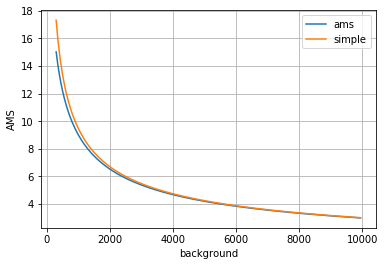

In [25]:
import matplotlib.pyplot as plt
%matplotlib inline

sig=300
bg=np.arange(300,10000,50)

amsv1=ams(sig,bg)
amsv2=sig/np.sqrt(bg)
#print (amsv1, amsv2)
plt.plot(bg, amsv1,label='ams')
plt.plot(bg, amsv2,label='simple')
plt.xlabel('background') # x-axis
plt.ylabel('AMS')# y-axis
plt.grid(True)
plt.legend();